In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from src.eda import EDA
from src.preprocess import DataProcessor
from src.OLS import RidgeRunner
import pandas as pd
import numpy as np

In [ ]:
#DataProcessor(save_option=True).process_all()

In [2]:
RidgeRunner().run()

RidgeCV folds:   0%|          | 0/10 [00:00<?, ?it/s]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds:  10%|█         | 1/10 [00:23<03:32, 23.56s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds:  20%|██        | 2/10 [00:49<03:20, 25.03s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds:  30%|███       | 3/10 [01:20<03:13, 27.65s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/silvioklein/Desktop/Thesis/envs/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
RidgeCV folds:  40%|████      | 4/10 [01:58<03:10, 31.75s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds:  50%|█████     | 5/10 [02:41<02:58, 35.73s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds:  60%|██████    | 6/10 [03:31<02:42, 40.58s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds:  70%|███████   | 7/10 [04:28<02:18, 46.10s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds:  80%|████████  | 8/10 [05:34<01:44, 52.42s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds:  90%|█████████ | 9/10 [06:34<00:54, 54.68s/it]

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RidgeCV folds: 100%|██████████| 10/10 [07:37<00:00, 45.73s/it]


✓ Results written to data/processed/ols_results.xlsx


In [2]:
eda = EDA()

In [4]:
eda.vif_table()

,vif,high
date_of_listing,7.135297e+09,True
date_of_listing_year,5.713911e+04,True
date_of_listing_month,1.395908e+02,True
date_of_listing_yearquarter,8.883637e+01,True
global_price_6m_prior,5.782600e+01,True
global_price_1m_prior,5.647279e+01,True
pc6_price_2y_prior,4.358598e+00,False
pc6_price_6m_prior,4.127746e+00,False
gross_volume,3.176888e+00,False
unit_surface,3.031571e+00,False


In [3]:
df_2 = pd.read_parquet('../data/processed/processed_data_lin.parquet').drop(columns=['mortgage_rate', 'unemployment_rate', 'ciss'])
results_2 = df_2.transaction_price

dp = DataProcessor()
others = [c for c in df_2.columns if c not in dp.center_cols+dp.scale_cols]

ct_ols = ColumnTransformer(
        [('center', StandardScaler(with_std=False),  dp.center_cols),
         ('scale',  StandardScaler(),                dp.scale_cols),
         ('pass',   'passthrough',                   others)]
)

col_names = ([col for col in dp.center_cols] +
             [col for col in dp.scale_cols] +
             [col for col in others])

tester = pd.DataFrame(ct_ols.fit_transform(df_2), columns=col_names).astype(float)

In [6]:
columns_to_check = [col for col in tester.columns if col != 'transaction_price']
eda.vif_table(df_tmp=tester, cols=columns_to_check)

,vif,high
lat,2217.627116,True
lon,1607.456454,True
mortgage_rate,84.148520,True
unemployment_rate,47.785526,True
gross_volume,38.237424,True
quality,37.702275,True
unit_surface,32.724462,True
property_class_eengezinswoning,32.052908,True
rooms_nr,31.192426,True
nuts3_region_NL350,23.312944,True


In [4]:
end_train = 300000
start_test, end_test = 400000, 450000

In [5]:
X_train = sm.add_constant(tester.iloc[:end_train].drop(columns=['transaction_price']))
y_train = df_2.iloc[:end_train]['transaction_price']
X_test = sm.add_constant(tester.iloc[start_test:end_test].drop(columns=['transaction_price']))
y_test = df_2.iloc[start_test:end_test]['transaction_price']
model = sm.OLS(y_train, X_train).fit()

ols_pred = model.predict(X_test)
ols_rmse = ((np.exp(ols_pred) - np.exp(y_test)) ** 2).mean() ** 0.5
ols_mae = (abs(np.exp(ols_pred) - np.exp(y_test))).mean()
ols_mape = (abs(np.exp(ols_pred) - np.exp(y_test)) / np.exp(y_test)).mean() * 100
ols_mdape = (abs(np.exp(ols_pred) - np.exp(y_test)) / np.exp(y_test)).median() * 100

print(f"RMSE/MAE/MAPE/MdAPE OLS: {ols_rmse:.2f}, {ols_mae:.2f}, {ols_mape:.2f}, {ols_mdape:.2f}")

RMSE/MAE/MAPE/MdAPE OLS: 62640.76, 38700.19, 13.12, 10.56


In [6]:
corr_matrix = df_2.select_dtypes(include=['Int8', 'int8', 'Int16', 'int16','int32', 'int64', 'float64', 'Int64', 'Float64']).corr()
corr_matrix.style.background_gradient(cmap='Blues')

,construction_yr,unit_surface,gross_volume,parcel_surface,rooms_nr,transaction_price,date_of_listing,lon,lat,month_sin,month_cos,pc6_price_2y_prior,global_price_6m_prior,ciss,unemployment_rate,mortgage_rate,quality,global_price_1m_minus_6m,pc6_price_6m_minus_2y,property_class_eengezinswoning,property_class_herenhuis,property_class_villa,property_class_woonboerderij,property_type_Hoekwoning,property_type_Schakelwoning,property_type_Tussenwoning,property_type_Vrijstaande woning,shed_none,shed_stone,shed_wood,nuts3_region_NL212,nuts3_region_NL213,nuts3_region_NL221,nuts3_region_NL224,nuts3_region_NL225,nuts3_region_NL226,nuts3_region_NL230,nuts3_region_NL327,nuts3_region_NL32B,nuts3_region_NL350,nuts3_region_NL415,nuts3_region_NL416,monument_wel monument
construction_yr,1.000000,0.050529,0.025797,-0.021423,0.038156,-0.052839,0.056475,0.044802,0.005701,-0.003565,0.006073,-0.072537,0.045695,-0.010981,0.036230,-0.050796,0.201550,-0.006654,-0.017954,0.049569,-0.049442,-0.023854,-0.137612,0.014273,0.069085,0.008367,-0.040826,-0.039753,-0.074981,0.100073,-0.012190,0.008242,0.039283,-0.001262,0.008003,0.024077,0.210801,-0.184983,-0.003026,-0.079406,-0.006266,0.050109,-0.242361
unit_surface,0.050529,1.000000,0.794240,0.567540,0.488155,0.614082,0.027677,0.056139,-0.031868,0.000605,-0.013029,0.323288,0.013876,-0.006690,0.019568,-0.022705,0.077699,-0.000024,-0.192668,-0.443757,0.250782,0.359706,0.081845,-0.097040,0.047660,-0.350451,0.392466,0.217874,-0.215562,-0.028781,-0.024344,0.027828,-0.005669,0.009942,0.035330,0.025129,-0.021970,0.035227,-0.034113,-0.053708,0.006305,0.045191,0.057967
gross_volume,0.025797,0.794240,1.000000,0.534878,0.548312,0.674074,0.097282,0.033340,-0.059584,-0.004761,-0.015007,0.357230,0.045550,-0.023506,0.056090,-0.092074,0.125849,0.006924,-0.191980,-0.472110,0.278579,0.388249,0.092492,-0.101676,0.048777,-0.321146,0.379216,0.206456,-0.221179,-0.013822,-0.021100,0.018173,-0.028471,0.008157,0.035926,0.035247,-0.037318,0.044287,-0.026760,-0.033714,0.005121,0.048658,0.085022
parcel_surface,-0.021423,0.567540,0.534878,1.000000,0.265410,0.548043,0.032661,0.165803,-0.042841,0.007482,-0.012745,0.290185,0.019149,-0.000655,0.026378,-0.017036,-0.006058,-0.010706,-0.191861,-0.415808,0.091898,0.387262,0.103889,-0.091269,-0.004442,-0.526637,0.637654,0.225293,-0.193783,-0.012547,-0.022085,0.063749,0.085441,0.056385,0.102958,0.020186,-0.069977,0.000046,-0.053206,-0.134688,0.024754,0.022510,0.011349
rooms_nr,0.038156,0.488155,0.548312,0.265410,1.000000,0.416068,0.118084,0.030781,-0.017577,-0.001719,-0.009697,0.245862,0.078990,0.006684,0.074112,-0.078907,0.040856,-0.024712,-0.116796,-0.208913,0.177704,0.196157,0.021824,-0.043282,-0.000643,-0.136629,0.136084,0.071169,-0.044572,-0.030663,-0.017655,0.034328,0.027099,-0.019063,-0.007685,0.010363,-0.054993,0.032825,-0.036156,-0.007076,0.004324,0.018188,0.023667
transaction_price,-0.052839,0.614082,0.674074,0.548043,0.416068,1.000000,0.181092,-0.228722,-0.036976,-0.006359,-0.025607,0.730762,0.279017,0.003266,0.089637,-0.113600,0.209391,-0.057278,-0.209907,-0.468678,0.221950,0.428256,0.076512,-0.091030,0.024692,-0.367576,0.372560,0.225545,-0.238245,0.011415,-0.081771,-0.127535,0.032309,-0.003675,-0.094391,-0.060933,-0.157611,0.191062,0.019474,0.176823,-0.002714,-0.006478,0.080310
date_of_listing,0.056475,0.027677,0.097282,0.032661,0.118084,0.181092,1.000000,0.066443,-0.025278,-0.025364,-0.016650,0.281851,0.629022,-0.046433,0.695898,-0.769102,-0.016693,-0.193557,-0.056815,0.125501,-0.113237,-0.057076,-0.008214,-0.011006,-0.001239,-0.012066,0.012946,-0.005055,-0.036015,0.057847,0.005557,0.040325,0.018090,0.006558,0.032353,0.015748,-0.041817,-0.022534,0.004143,-0.035011,0.003529,0.007717,0.005511
lon,0.044802,0.056139,0.033340,0.165803,0.030781,-0.228722,0.066443,1.000000,0.047785,-0.002933,0.001865,-0.252636,0.093748,0.004227,0.038501,-0.036483,-0.002471,-0.032360,-0.029335,0.018023,0.019756,-0.095574,-0.016382,-0.041088,0.004111,-0.171062,0.134760,0.059297,-0.010607,-0.043647,0.226054,0.545

In [10]:
eda.descriptive_stats()

,unit_surface,gross_volume,rooms_nr,initial_list_price,transaction_price,duration
count,486560.0,486560.0,486560.0,486560.0,486560.0,486560.0
mean,129.76,398.94,4.85,12.42,12.36,157.38
std,41.86,126.35,1.1,0.41,0.4,239.58
min,1.0,75.0,0.0,10.34,10.37,1.0
1%,65.0,210.0,3.0,11.61,11.56,3.0
5%,80.0,255.0,3.0,11.84,11.79,10.0
50%,122.0,370.0,5.0,12.37,12.31,75.0
95%,203.0,635.0,7.0,13.19,13.11,564.0
99%,269.0,853.0,8.0,13.57,13.5,1198.0
max,5200.0,1992.0,9.0,15.4,15.4,4039.0


In [18]:
eda.missing_values()

Series([], dtype: int64)

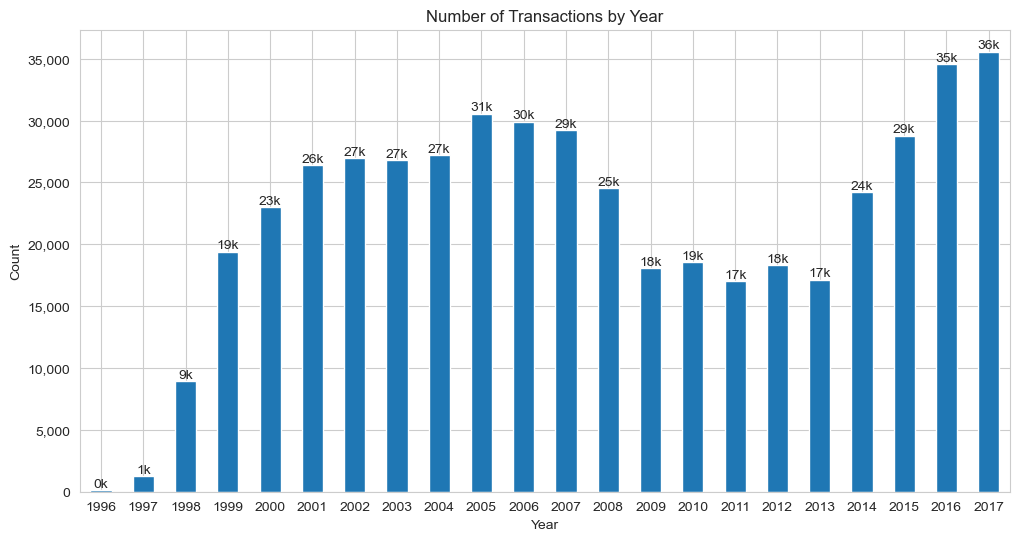

In [19]:
eda.transactions_by_year()

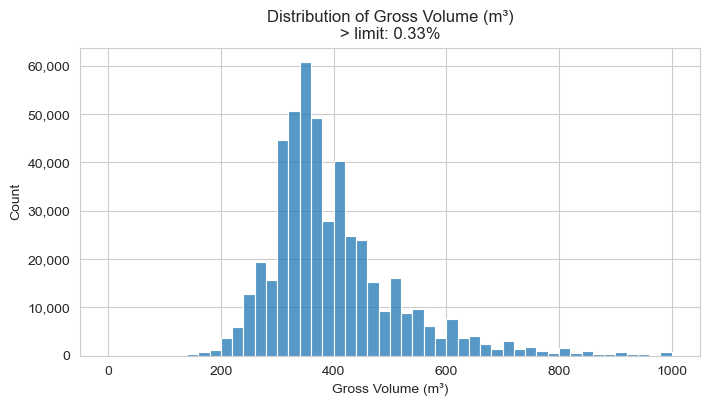

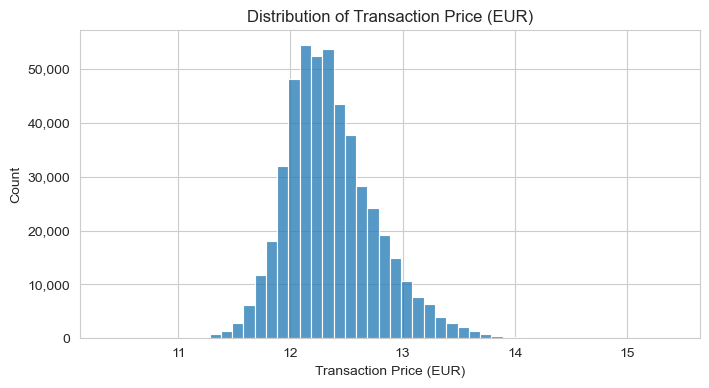

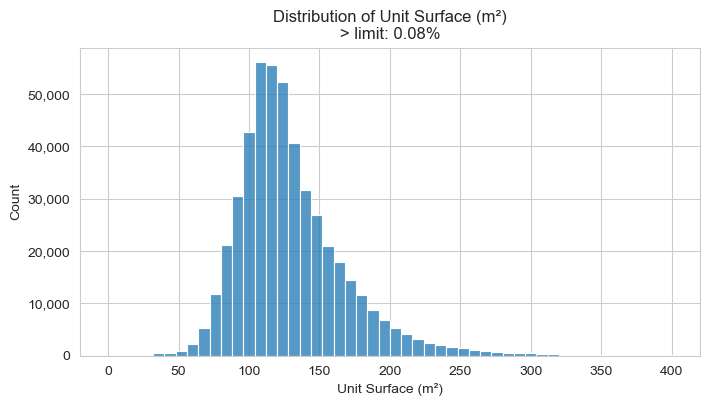

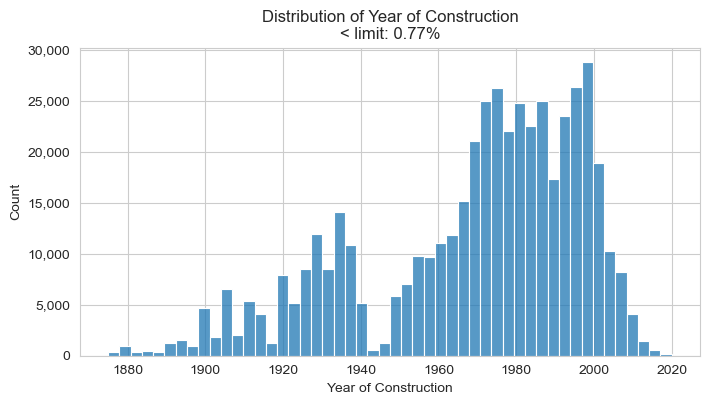

In [20]:
eda.histograms()

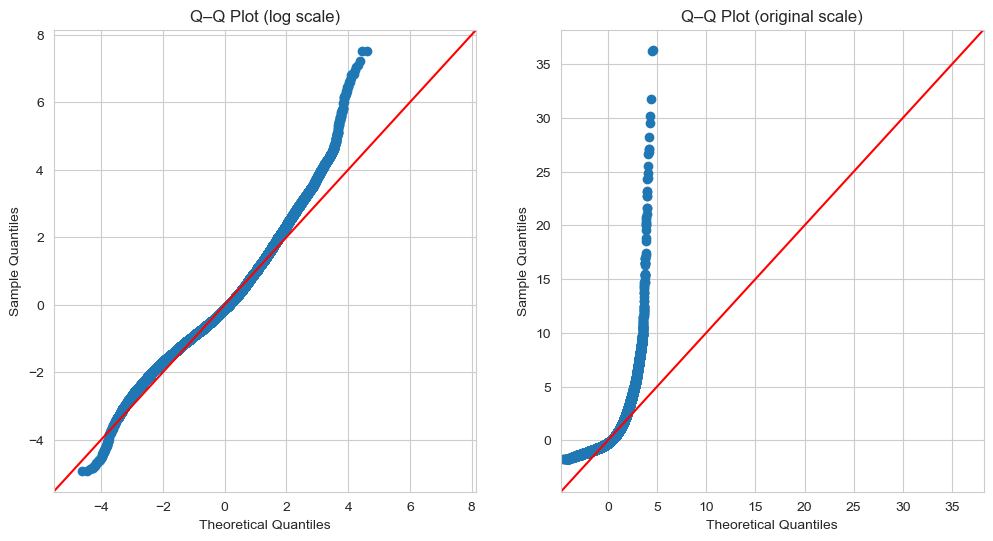

In [21]:
eda.qqplots()

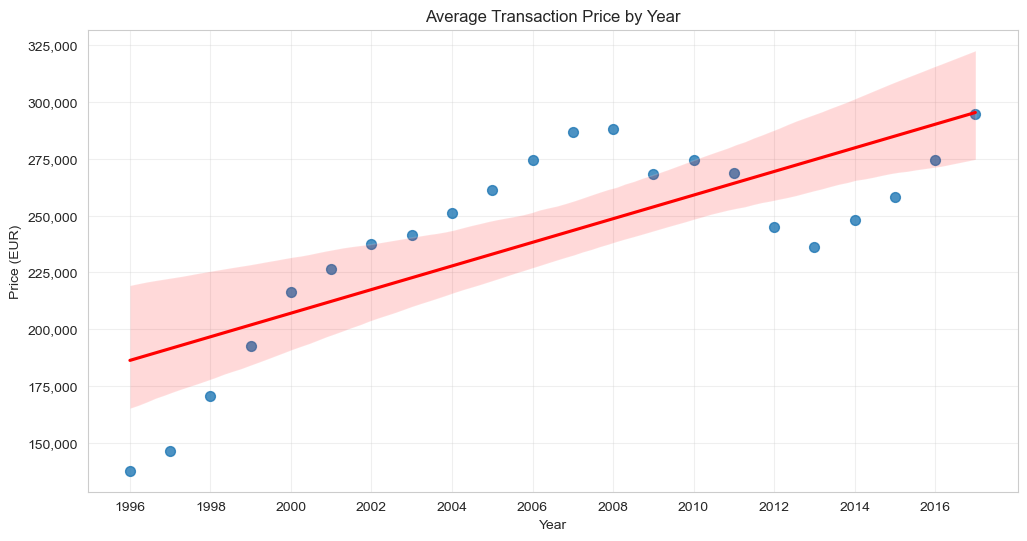

In [22]:
eda.avg_price_by_year()

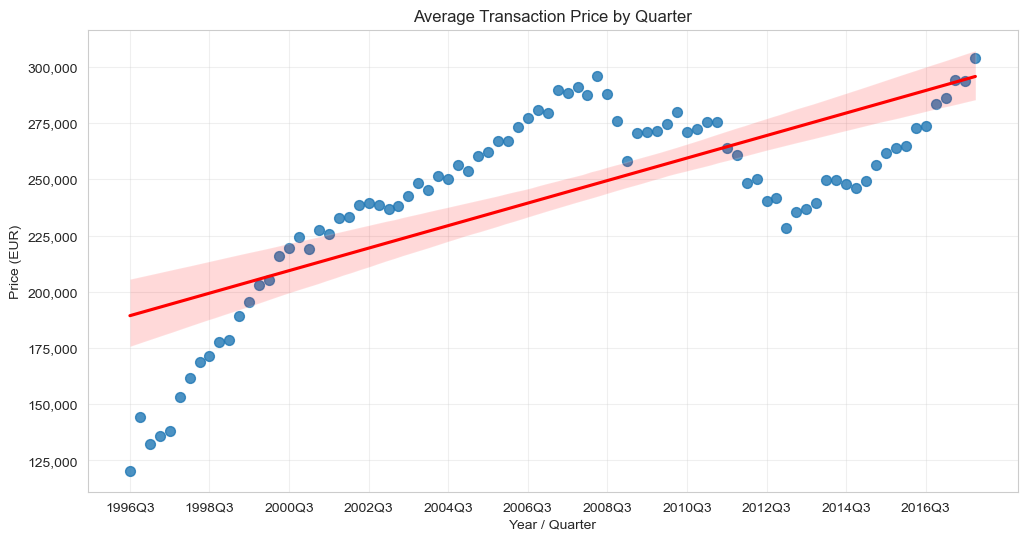

In [23]:
eda.avg_price_by_quarter()

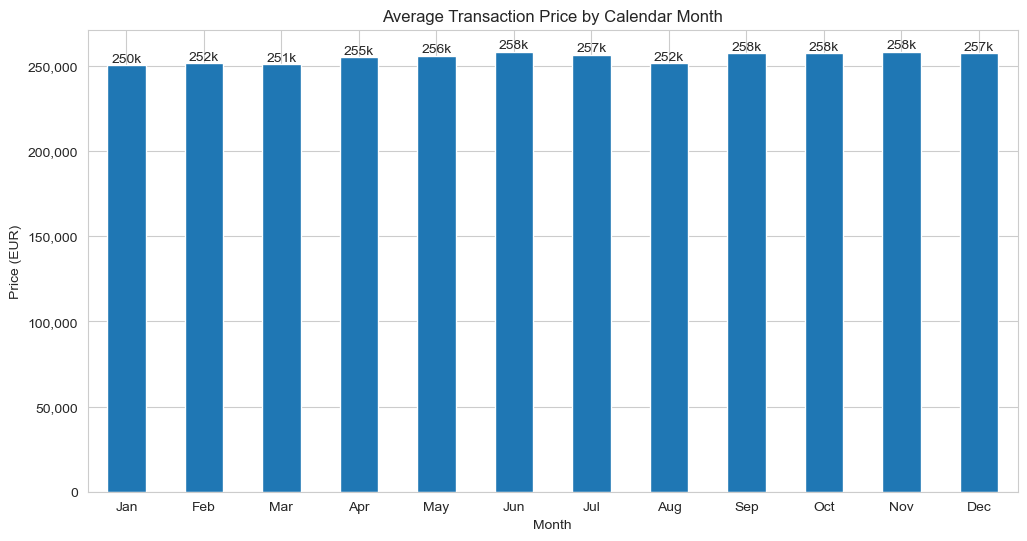

In [24]:
eda.avg_price_by_month()

In [25]:
eda.categorical_rollup_analysis()

,Column,Total,< 1%
0,use_type,60,59
1,addition,163,161
2,property_class,7,3
3,property_type,5,0
4,qual_inside,9,3
5,qual_outside,10,5
6,shed,7,1
7,monument,2,1


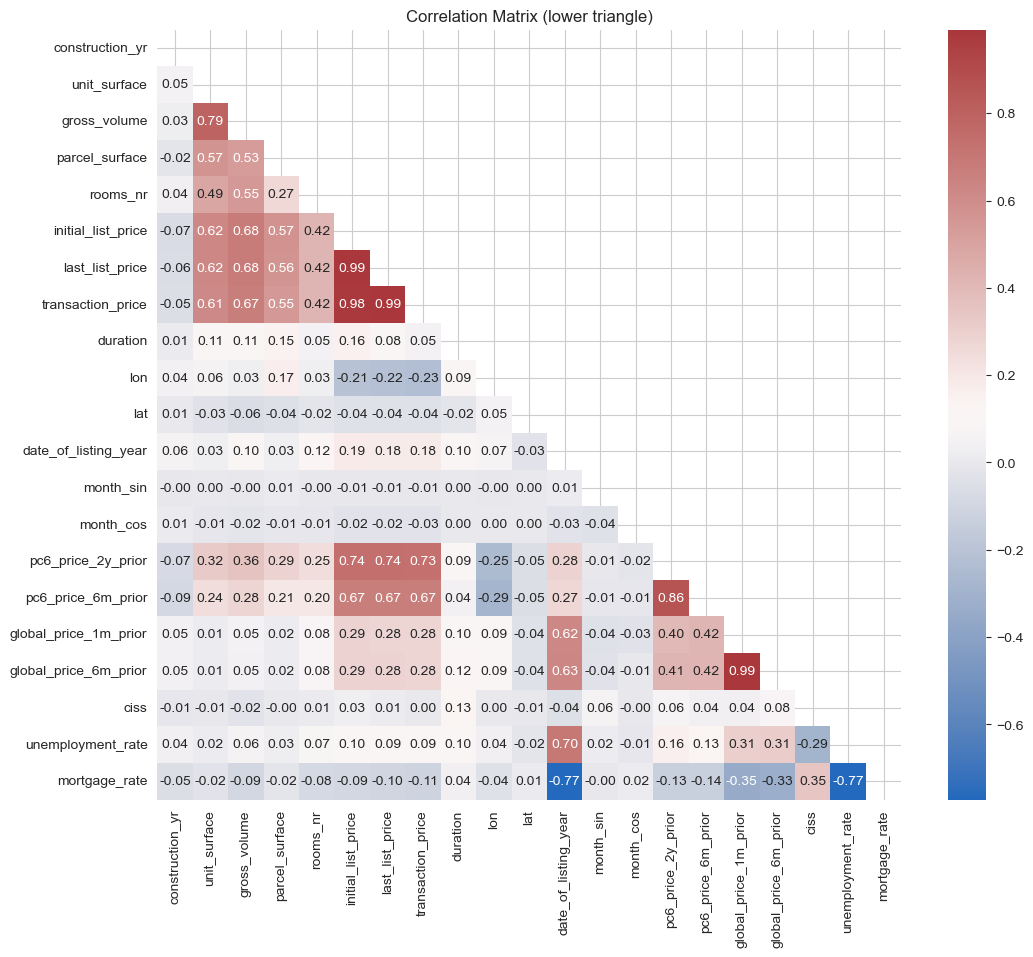

In [3]:
eda.correlation_matrix()

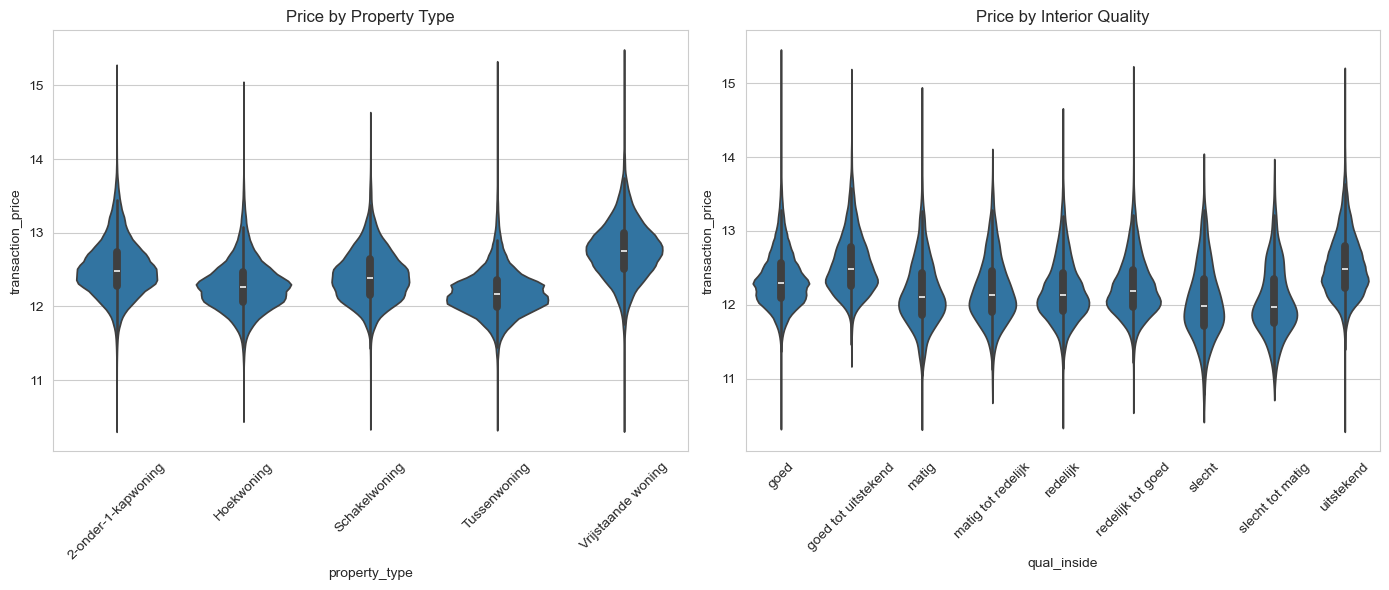

In [27]:
eda.violin_plots()

/Users/silvioklein/Desktop/Thesis/src/eda.py:328: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data=self.df.query("unit_surface <= 750 and qual_inside in @qual"),


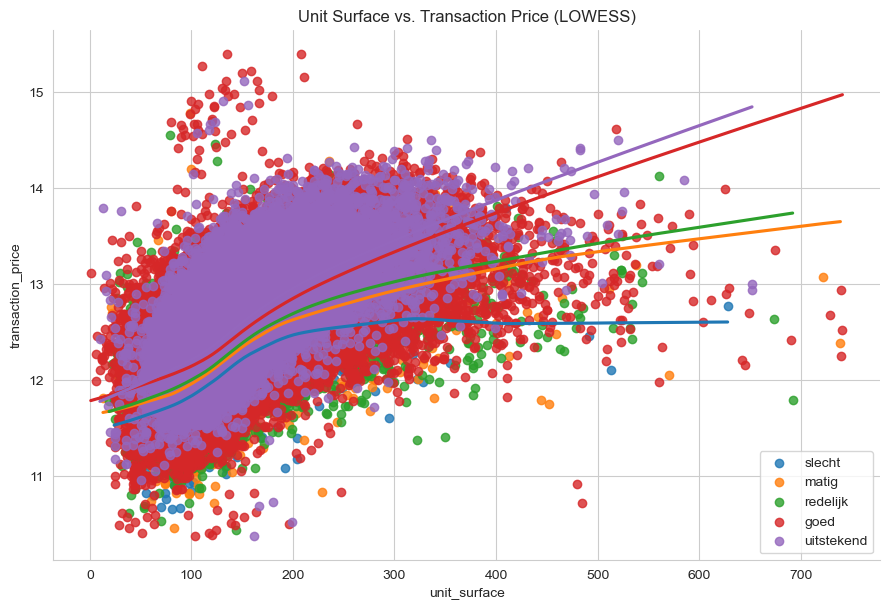

In [29]:
eda.scatter_unit_surface()

/Users/silvioklein/Desktop/Thesis/src/eda.py:343: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["transaction_price"]


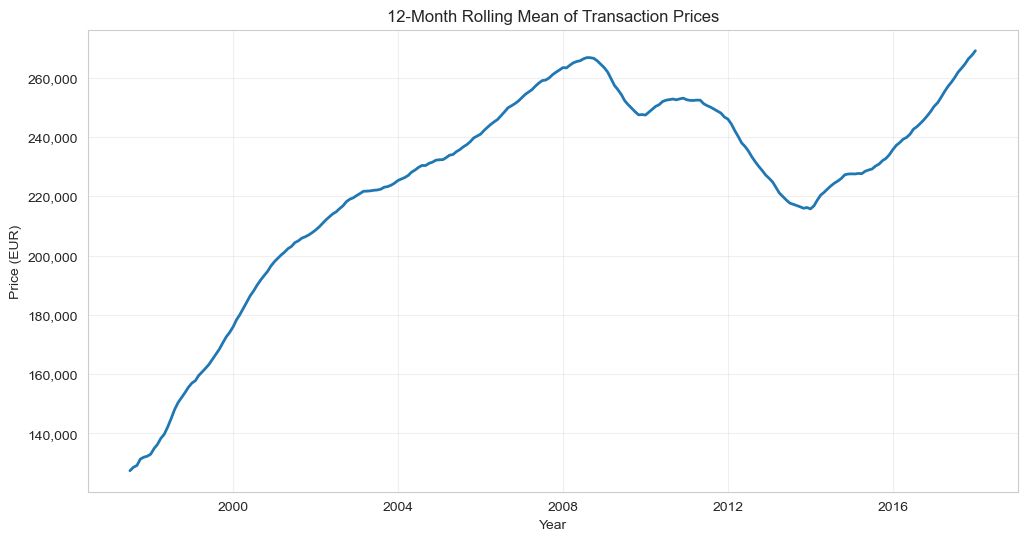

In [30]:
eda.rolling_mean_price()

In [36]:
eda.make_maps("nuts3")

/Users/silvioklein/Desktop/Thesis/src/eda.py:423: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  if self.save_option:
